# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
import pandas as pd

k_obe_df = pd.read_csv('/content/drive/MyDrive/KDT/프로젝트/세미 프로젝트/data/K_Obestiy_240227_AddedObe.csv')
k_obe_df

,Gender,Age,CALC,SMOKE,FAF_Time,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad,BMI,HE_BMI_pct
0,1,57,3,0,0.000000,0.0,1.793,82.0,4,2.571429,1,3.0,0,3.000000,4,25.5066412139419,
1,0,39,3,0,0.000000,0.0,1.599,59.0,4,1.714286,1,3.0,0,2.000000,3,23.0757106243309,
2,0,19,1,0,4.000000,4.0,1.697,63.1,4,1.357143,1,2.0,0,2.000000,2,21.9111753591992,
3,1,50,1,0,0.000000,0.0,1.722,55.1,4,2.143449,1,3.0,0,5.492455,2,18.5816940299816,
4,1,49,3,0,0.237481,2.0,1.798,90.1,4,1.714286,0,3.0,1,5.000000,4,27.8705421052436,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,62,3,1,0.000000,0.0,1.717,61.4,2,2.571429,1,3.0,0,3.000000,2,20.8270510150813,
3831,0,62,3,0,0.000000,0.0,1.633,64.8,1,2.571429,1,3.0,0,3.500000,3,24.2997964892044,
3832,1,62,0,1,0.000000,0.0,1.647,68.3,1,2.214286,1,3.0,0,2.000000,4,25.1787117125985,
3833,0,64,1,0,0.000000,0.0,1.596,63.5,1,2.571429,0,3.0,0,7.500000,3,24.9291775805428,


In [3]:
k_obe = k_obe_df.drop(['BMI', 'HE_BMI_pct', 'FAF_Time'], axis=1)
k_obe

,Gender,Age,CALC,SMOKE,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad
0,1,57,3,0,0.0,1.793,82.0,4,2.571429,1,3.0,0,3.000000,4
1,0,39,3,0,0.0,1.599,59.0,4,1.714286,1,3.0,0,2.000000,3
2,0,19,1,0,4.0,1.697,63.1,4,1.357143,1,2.0,0,2.000000,2
3,1,50,1,0,0.0,1.722,55.1,4,2.143449,1,3.0,0,5.492455,2
4,1,49,3,0,2.0,1.798,90.1,4,1.714286,0,3.0,1,5.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,62,3,1,0.0,1.717,61.4,2,2.571429,1,3.0,0,3.000000,2
3831,0,62,3,0,0.0,1.633,64.8,1,2.571429,1,3.0,0,3.500000,3
3832,1,62,0,1,0.0,1.647,68.3,1,2.214286,1,3.0,0,2.000000,4
3833,0,64,1,0,0.0,1.596,63.5,1,2.571429,0,3.0,0,7.500000,3


# 정규화
- StandardScaler : ['Age', 'Height', 'Weight', 'CH2O']
- mm_scaler = ['CALC', 'FAF_Day', 'TUE', 'NCP', 'FCVC']

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import copy

k_obe_Scaled =  copy.deepcopy(k_obe)
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
cont_vars = ['Age', 'Height', 'Weight', 'CH2O']
ord_vars = ['CALC', 'FAF_Day', 'TUE', 'NCP', 'FCVC']
k_obe_Scaled[cont_vars] = std_scaler.fit_transform(k_obe_Scaled[cont_vars])
k_obe_Scaled[ord_vars] = mm_scaler.fit_transform(k_obe_Scaled[ord_vars])
k_obe_Scaled

,Gender,Age,CALC,SMOKE,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad
0,1,1.014874,1.000000,0,0.000000,1.592583,1.198510,1.000000,1.000000,1,1.000000,0,-0.896240,4
1,0,-0.177216,1.000000,0,0.000000,-0.603569,-0.461753,1.000000,0.636364,1,1.000000,0,-1.331935,3
2,0,-1.501760,0.333333,0,0.571429,0.505827,-0.165793,1.000000,0.484848,1,0.666667,0,-1.331935,2
3,1,0.551283,0.333333,0,0.000000,0.788837,-0.743276,1.000000,0.818433,1,1.000000,0,0.189710,2
4,1,0.485056,1.000000,0,0.285714,1.649185,1.783212,1.000000,0.636364,0,1.000000,1,-0.024850,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,1.346010,1.000000,1,0.000000,0.732235,-0.288508,0.333333,1.000000,1,1.000000,0,-0.896240,2
3831,0,1.346010,1.000000,0,0.000000,-0.218677,-0.043078,0.000000,1.000000,1,1.000000,0,-0.678392,3
3832,1,1.346010,0.000000,1,0.000000,-0.060191,0.209571,0.000000,0.848485,1,1.000000,0,-1.331935,4
3833,0,1.478464,0.333333,0,0.000000,-0.637530,-0.136919,0.000000,1.000000,0,1.000000,0,1.064388,3


# GBM

## 정규화X_ average='weighted’ &  scoring="f1_weighted"
사실.. 그런 생각이 없었는데,, 잘못 입력해서 정규화 안한버전에 weighted만 변경한 꼴이 되어버림. 이위에 덮으려다가 그래도 한게 아까워서 weighted의 효과를 보고자 그대로 두고 밑에 정규화 한 버전에 weighted를 줘봄

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    k_obe.drop(['NObeyesdad'], axis=1),
    k_obe['NObeyesdad'],
    random_state=42,
    stratify=k_obe['NObeyesdad']
)

X_train

,Gender,Age,CALC,SMOKE,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O
3156,1,16,0,0,3.0,1.673,42.2,4,1.714286,1,3.0,0,1.000000
1459,1,39,1,0,0.0,1.749,78.5,4,2.143449,1,3.0,0,5.400371
505,0,58,0,0,0.0,1.584,90.2,2,1.500000,0,3.0,0,4.000000
1758,1,43,2,0,0.0,1.772,77.5,4,2.143449,1,3.0,0,5.381382
3046,1,31,1,0,0.0,1.814,80.6,4,2.214286,0,3.0,0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,0,25,2,0,0.0,1.617,47.1,4,1.928571,1,2.0,0,1.500000
2496,1,45,2,0,2.0,1.742,83.0,2,2.571429,1,3.0,0,7.500000
2981,0,42,1,0,0.0,1.578,57.6,4,1.714286,1,3.0,0,1.000000
2534,1,59,0,0,5.0,1.758,94.2,1,2.143449,1,3.0,0,5.332632


오차 행렬 : 
[[ 40   9   0   0   0   0]
 [  3 371  12   0   0   0]
 [  0   9 183   8   0   0]
 [  0   0   9 251   2   0]
 [  0   0   0   7  43   3]
 [  0   0   0   0   3   6]]
train 정확도 : 0.991307371349096
test 정확도 : 0.9322210636079249
정밀도 : 0.9337027297190438
재현율 : 0.9322210636079249
F1 : 0.9326507996334004
Training time: 3.2624053955078125 seconds


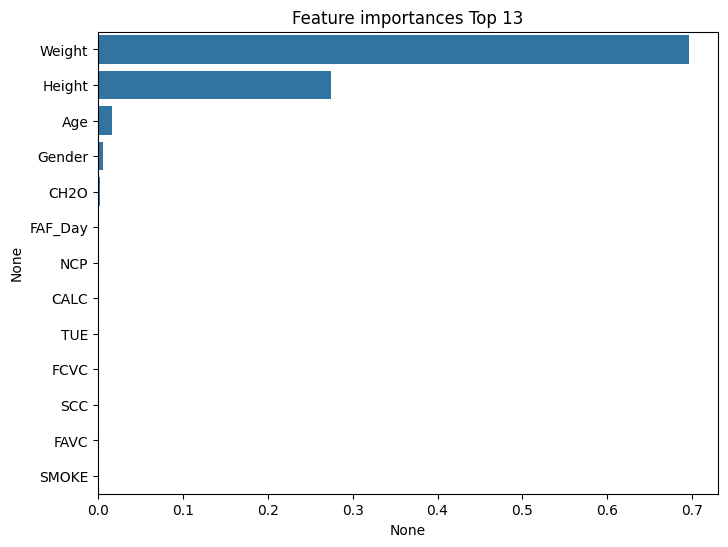

In [ ]:
# 디폴트 값 분석

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import time

start_time = time.time()

# 모델 생성
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1
)

# 학습
gb_clf.fit(X_train, y_train)

# 과적합 확인용 train predict생성
gbm_pred_train =  gb_clf.predict(X_train)
gbm_pred_test =  gb_clf.predict(X_test)


# 오차행렬
y_matrix = confusion_matrix(y_test, gbm_pred_test)
print("오차 행렬 : \n{}".format(y_matrix))

accuracy_train = accuracy_score(gbm_pred_train, y_train)
accuracy_test = accuracy_score(gbm_pred_test, y_test)
precision = precision_score(gbm_pred_test, y_test, average='weighted')
recall = recall_score(gbm_pred_test, y_test, average='weighted')
f1 = f1_score(gbm_pred_test, y_test, average='weighted')

print("train 정확도 : {}".format(accuracy_train))
print("test 정확도 : {}".format(accuracy_test))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))


# 학습 소요 시간 계산
end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

# 특성 중요도

import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(gb_clf, columns, limit=None):
    ftr_importances_values = gb_clf.feature_importances_
    # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
    ftr_importances = pd.Series(ftr_importances_values, index=columns)
    # 중요도값 순으로 Series를 정렬
    ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
    plt.figure(figsize=(8,6))
    plt.title(f'Feature importances Top {len(columns) if limit is None else limit}')
    sns.barplot(x=ftr_top, y=ftr_top.index)
    plt.show()

# plot_feature_importance 함수 호출
plot_feature_importance(gb_clf, X_train.columns)




## 그리드 서치
파라미터 값이 별로 없어서 그리드 서치로 진행!

In [ ]:
from sklearn.model_selection import GridSearchCV

start_time = time.time()

gb_param_grid={
    'n_estimators' : [50, 100, 500, 1000],
    'learning_rate' : [0.01,0.05, 0.75, 0.1],
}

gb_grid=GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid = gb_param_grid,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1,
)

gb_grid.fit(X_train, y_train)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

print("best f1_weighted : {0: .4f}".format(gb_grid.best_score_))
print("best param : ",gb_grid.best_params_)

Training time: 392.13216614723206 seconds
best f1_weighted :  0.9089
best param :  {'learning_rate': 0.05, 'n_estimators': 500}


In [ ]:
# 그리드서치2

start_time = time.time()

gb_param_grid={
    'n_estimators' : [300, 500, 700],
    'learning_rate' : [0.04,0.05, 0.06],
}

gb_grid2=GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid = gb_param_grid,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1,
)

gb_grid2.fit(X_train, y_train)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

print("best f1_weighted : {0: .4f}".format(gb_grid2.best_score_))
print("best param : ",gb_grid2.best_params_)

Training time: 275.4582061767578 seconds
best f1_weighted :  0.9099
best param :  {'learning_rate': 0.04, 'n_estimators': 500}


In [ ]:
# 그리드서치3

start_time = time.time()

gb_param_grid={
    'n_estimators' : [400, 500, 600],
    'learning_rate' : [0.035,0.04, 0.045],
}

gb_grid3=GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid = gb_param_grid,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1,
)

gb_grid3.fit(X_train, y_train)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

print("best f1_weighted : {0: .4f}".format(gb_grid3.best_score_))
print("best param : ",gb_grid3.best_params_)

Training time: 284.9258680343628 seconds
best f1_weighted :  0.9099
best param :  {'learning_rate': 0.04, 'n_estimators': 500}


In [ ]:
# 최적의 모델 지정
estimator = gb_grid3.best_estimator_
grid_pred_test = estimator.predict(X_test)
grid_pred_train = estimator.predict(X_train)

# 성능 평가
grid_matrix = confusion_matrix(y_test, grid_pred_test)
print("오차 행렬 : \n{}".format(grid_matrix))

# 성능 평가하기
grid_accuracy_test = accuracy_score(grid_pred_test, y_test)
grid_accuracy_train = accuracy_score(grid_pred_train, y_train)

precision = precision_score(grid_pred_test, y_test, average='weighted')
recall = recall_score(grid_pred_test, y_test, average='weighted')
f1 = f1_score(grid_pred_test, y_test, average='weighted')

print("train 정확도 : {}".format(grid_accuracy_train))
print("test 정확도 : {}".format(grid_accuracy_test))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[ 42   7   0   0   0   0]
 [  3 370  13   0   0   0]
 [  0  10 185   5   0   0]
 [  0   0  10 249   3   0]
 [  0   0   0   7  43   3]
 [  0   0   0   0   3   6]]
train 정확도 : 0.9996522948539638
test 정확도 : 0.9332638164754953
정밀도 : 0.9340295235620117
재현율 : 0.9332638164754953
F1 : 0.9334270047905584


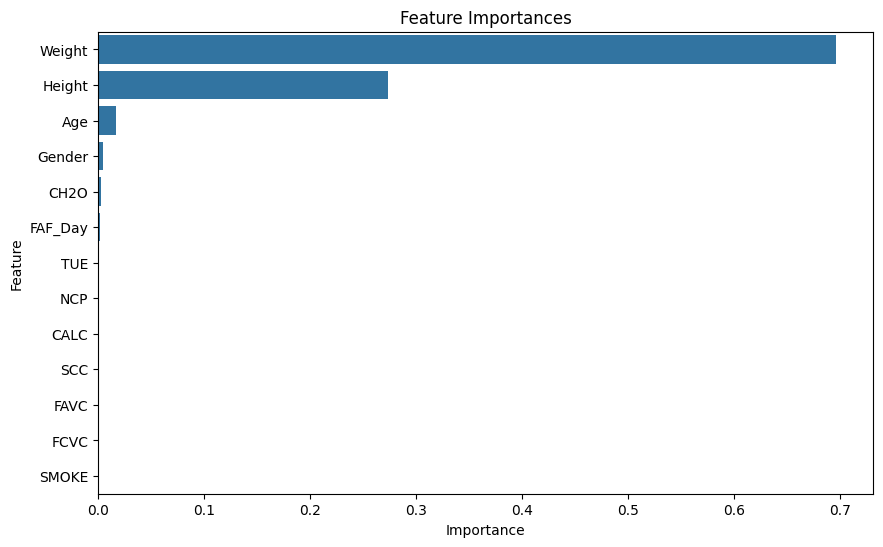

In [ ]:
# 특성 중요도
def plot_feature_importance(estimator, columns):
    ftr_importances_values = estimator.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=columns)
    ftr_top = ftr_importances.sort_values(ascending=False)[:]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    sns.barplot(x=ftr_top, y=ftr_top.index)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# 특성 중요도 그리기
plot_feature_importance(estimator, X_test.columns)


## 신장 제외 분석해보기
성능이 올라 갔으니 한번 신장 제외한거 돌려보까?

In [ ]:
new_k_obe = k_obe.drop(['Height'], axis=1)
new_k_obe

,Gender,Age,CALC,SMOKE,FAF_Day,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad
0,1,57,3,0,0.0,82.0,4,2.571429,1,3.0,0,3.000000,4
1,0,39,3,0,0.0,59.0,4,1.714286,1,3.0,0,2.000000,3
2,0,19,1,0,4.0,63.1,4,1.357143,1,2.0,0,2.000000,2
3,1,50,1,0,0.0,55.1,4,2.143449,1,3.0,0,5.492455,2
4,1,49,3,0,2.0,90.1,4,1.714286,0,3.0,1,5.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,62,3,1,0.0,61.4,2,2.571429,1,3.0,0,3.000000,2
3831,0,62,3,0,0.0,64.8,1,2.571429,1,3.0,0,3.500000,3
3832,1,62,0,1,0.0,68.3,1,2.214286,1,3.0,0,2.000000,4
3833,0,64,1,0,0.0,63.5,1,2.571429,0,3.0,0,7.500000,3


In [ ]:
New_train, New_test, new_train, new_test = train_test_split(
    new_k_obe.drop("NObeyesdad", axis=1),
    new_k_obe['NObeyesdad'],
    random_state=42,
    stratify=new_k_obe['NObeyesdad']
)
New_train

,Gender,Age,CALC,SMOKE,FAF_Day,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O
3156,1,16,0,0,3.0,42.2,4,1.714286,1,3.0,0,1.000000
1459,1,39,1,0,0.0,78.5,4,2.143449,1,3.0,0,5.400371
505,0,58,0,0,0.0,90.2,2,1.500000,0,3.0,0,4.000000
1758,1,43,2,0,0.0,77.5,4,2.143449,1,3.0,0,5.381382
3046,1,31,1,0,0.0,80.6,4,2.214286,0,3.0,0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
2817,0,25,2,0,0.0,47.1,4,1.928571,1,2.0,0,1.500000
2496,1,45,2,0,2.0,83.0,2,2.571429,1,3.0,0,7.500000
2981,0,42,1,0,0.0,57.6,4,1.714286,1,3.0,0,1.000000
2534,1,59,0,0,5.0,94.2,1,2.143449,1,3.0,0,5.332632


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()

# 그리드서치에서 잘나온 파라미터 그냥 넣어서 간만 보기
new_gb_clf = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.04
)

new_gb_clf.fit(New_train, new_train)
new_gbm_pred_test =  new_gb_clf.predict(New_test)
new_gbm_pred_train =  new_gb_clf.predict(New_train)

# 오차행렬
new_matrix = confusion_matrix(new_test, new_gbm_pred_test)
print("오차 행렬 : \n{}".format(new_matrix))

new_accuracy_test = accuracy_score(new_gbm_pred_test, new_test)
new_accuracy_train = accuracy_score(new_gbm_pred_train, new_train)

precision = precision_score(new_gbm_pred_test, new_test, average='weighted')
recall = recall_score(new_gbm_pred_test, new_test, average='weighted')
f1 = f1_score(new_gbm_pred_test, new_test, average='weighted')

print("train 정확도 : {}".format(new_accuracy_train))
print("test 정확도 : {}".format(new_accuracy_test))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

오차 행렬 : 
[[ 24  25   0   0   0   0]
 [ 14 314  48  10   0   0]
 [  0  60  87  53   0   0]
 [  0  14  44 188  16   0]
 [  0   0   1  19  26   7]
 [  0   0   0   0   3   6]]
train 정확도 : 0.8581363004172462
test 정확도 : 0.6725755995828988
정밀도 : 0.6854625358164279
재현율 : 0.6725755995828988
F1 : 0.6775733692468888
Training time: 16.346126556396484 seconds


오르긴 했으나 역시 모델로 쓸정도로 높지는 않음.. 기대하지 않는걸, 추천해야할듯

## 정규화O_ average='weighted’ &  scoring="f1_weighted"

In [5]:
from sklearn.model_selection import train_test_split

Xs_train, Xs_test, ys_train, ys_test = train_test_split(
    k_obe_Scaled.drop(['NObeyesdad'], axis=1),
    k_obe_Scaled['NObeyesdad'],
    random_state=42,
    stratify=k_obe_Scaled['NObeyesdad']
)

Xs_train

,Gender,Age,CALC,SMOKE,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O
3156,1,-1.700442,0.000000,0,0.428571,0.234138,-1.674467,1.000000,0.636364,1,1.000000,0,-1.767630
1459,1,-0.177216,0.333333,0,0.000000,1.094487,0.945862,1.000000,0.818433,1,1.000000,0,0.149590
505,0,1.081101,0.000000,0,0.000000,-0.773375,1.790430,0.333333,0.545455,0,1.000000,0,-0.460545
1758,1,0.087693,0.666667,0,0.000000,1.354856,0.873676,1.000000,0.818433,1,1.000000,0,0.141316
3046,1,-0.707034,0.333333,0,0.000000,1.830311,1.097451,1.000000,0.848485,0,1.000000,0,-1.114087
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,0,-1.104397,0.666667,0,0.000000,-0.399803,-1.320759,1.000000,0.727273,1,0.666667,0,-1.549782
2496,1,0.220147,0.666667,0,0.285714,1.015244,1.270696,0.333333,1.000000,1,1.000000,0,1.064388
2981,0,0.021466,0.333333,0,0.000000,-0.841297,-0.562812,1.000000,0.636364,1,1.000000,0,-1.767630
2534,1,1.147328,0.000000,0,0.714286,1.196370,2.079172,0.000000,0.818433,1,1.000000,0,0.120076


오차 행렬 : 
[[ 40   9   0   0   0   0]
 [  3 371  12   0   0   0]
 [  0  11 184   5   0   0]
 [  0   0  12 248   2   0]
 [  0   0   0   8  42   3]
 [  0   0   0   0   3   6]]
train 정확도 : 0.9937413073713491
test 정확도 : 0.9290928050052137
정밀도 : 0.9307262340266563
재현율 : 0.9290928050052137
F1 : 0.9295019264775508
Training time: 3.126023769378662 seconds


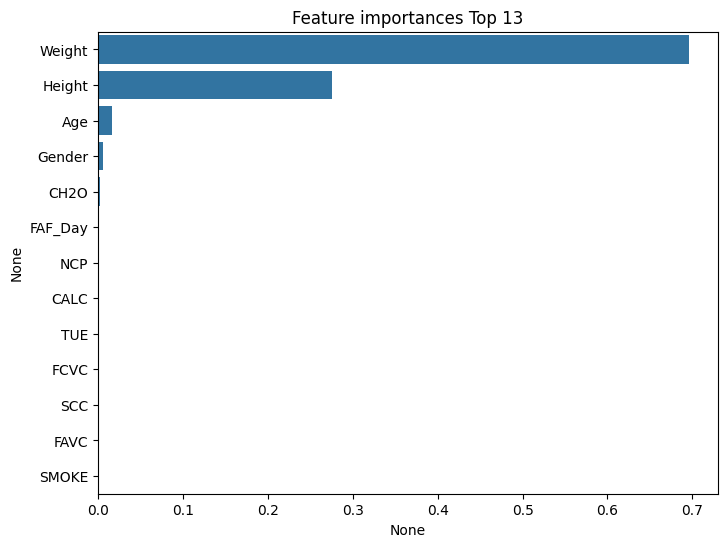

In [ ]:
# 디폴트 값 분석

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import time

start_time = time.time()

# 모델 생성
s_gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1
)

# 학습
s_gb_clf.fit(Xs_train, ys_train)

# 과적합 확인용 train predict생성
s_gbm_pred_train =  s_gb_clf.predict(Xs_train)
s_gbm_pred_tests =  s_gb_clf.predict(Xs_test)


# 오차행렬
ys_matrix = confusion_matrix(ys_test, s_gbm_pred_tests)
print("오차 행렬 : \n{}".format(ys_matrix))

s_accuracy_train = accuracy_score(s_gbm_pred_train, ys_train)
s_accuracy_test = accuracy_score(s_gbm_pred_tests, ys_test)

precision = precision_score(s_gbm_pred_tests, ys_test, average='weighted')
recall = recall_score(s_gbm_pred_tests, ys_test, average='weighted')
f1 = f1_score(s_gbm_pred_tests, ys_test, average='weighted')

print("train 정확도 : {}".format(s_accuracy_train))
print("test 정확도 : {}".format(s_accuracy_test))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))


# 학습 소요 시간 계산
end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

# 특성 중요도

import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(s_gb_clf, columns, limit=None):
    s_ftr_importances_values = s_gb_clf.feature_importances_
    # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
    s_ftr_importances = pd.Series(s_ftr_importances_values, index=columns)
    # 중요도값 순으로 Series를 정렬
    s_ftr_top = s_ftr_importances.sort_values(ascending=False)[:limit]
    plt.figure(figsize=(8,6))
    plt.title(f'Feature importances Top {len(columns) if limit is None else limit}')
    sns.barplot(x=s_ftr_top, y=s_ftr_top.index)
    plt.show()

# plot_feature_importance 함수 호출
plot_feature_importance(s_gb_clf, Xs_train.columns)




정규화를 했을때 오히려 train과 test의 정확도의 차이가 더 늘어났으며 f1값이 떨어진것을 볼수 있다.

## 그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV

start_time = time.time()

s_gb_param_grid={
    'n_estimators' : [50, 100, 500, 1000],
    'learning_rate' : [0.01,0.05, 0.75, 0.1], # 0.75는 실수 하지만 밑에 다시 0.06으로 값을 지정했으니 큰 문제는 없을 듯
}

s_gb_grid=GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid = s_gb_param_grid,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1,
)

s_gb_grid.fit(Xs_train, ys_train)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

print("best f1_weighted : {0: .4f}".format(s_gb_grid.best_score_))
print("best param : ",s_gb_grid.best_params_)

Training time: 358.1675925254822 seconds
best f1_weighted :  0.9086
best param :  {'learning_rate': 0.05, 'n_estimators': 500}


In [ ]:
from sklearn.model_selection import GridSearchCV

start_time = time.time()

s2_gb_param_grid={
    'n_estimators' : [300, 500, 700],
    'learning_rate' : [0.04,0.05, 0.06],
}

s2_gb_grid=GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid = s2_gb_param_grid,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1,
)

s2_gb_grid.fit(Xs_train, ys_train)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

print("best f1_weighted : {0: .4f}".format(s2_gb_grid.best_score_))
print("best param : ",s2_gb_grid.best_params_)

Training time: 281.1735863685608 seconds
best f1_weighted :  0.9098
best param :  {'learning_rate': 0.04, 'n_estimators': 500}


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import time

start_time = time.time()

s3_gb_param_grid={
    'n_estimators' : [400, 500, 600],
    'learning_rate' : [0.035,0.04, 0.045],
}

s3_gb_grid=GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid = s3_gb_param_grid,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1,
)

s3_gb_grid.fit(Xs_train, ys_train)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

print("best f1_weighted : {0: .4f}".format(s3_gb_grid.best_score_))
print("best param : ",s3_gb_grid.best_params_)

Training time: 282.5461332798004 seconds
best f1_weighted :  0.9098
best param :  {'learning_rate': 0.04, 'n_estimators': 500}


그리드서치를 했을때 거의 f1이 정규화 하지 않았을때 그리드 서치를 한것과 동일함을 확인함. 즉, 정규화의 유무는 gbm의 데이터에서는 큰 상관이 없는 것으로 나타나나 그래도 캐글 데이터와 동일하게 정규화를 진행하여 분포를 맞췄다는 점에 의의를 둠

오차 행렬 : 
[[ 42   7   0   0   0   0]
 [  3 370  13   0   0   0]
 [  0  10 185   5   0   0]
 [  0   0  10 249   3   0]
 [  0   0   0   7  43   3]
 [  0   0   0   0   3   6]]
train 정확도 : 0.9996522948539638
test 정확도 : 0.9332638164754953
정밀도 : 0.9340295235620117
재현율 : 0.9332638164754953
f1_test : 0.9334270047905584
f1_train : 0.9996522607610866


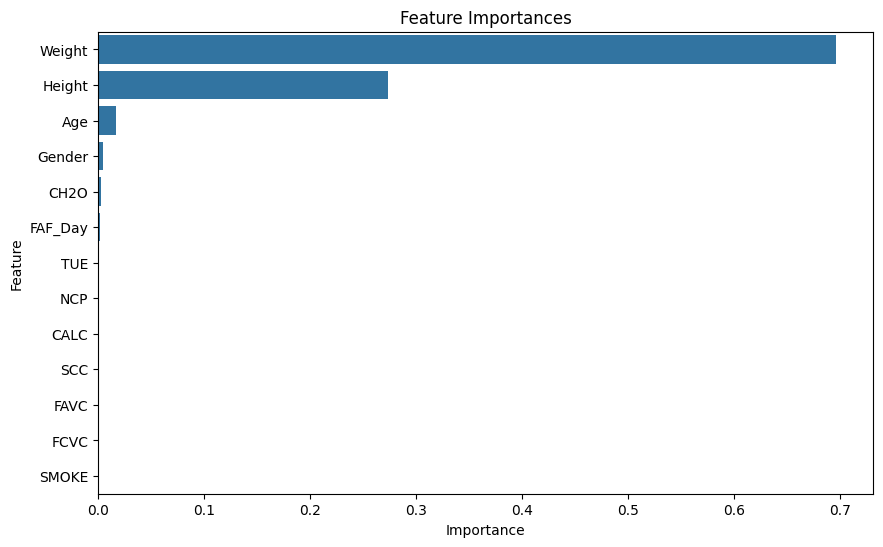

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# 최적의 모델 지정
s_estimator = s3_gb_grid.best_estimator_
s_grid_pred_test = s_estimator.predict(Xs_test)
s_grid_pred_train = s_estimator.predict(Xs_train)

# 성능 평가
s_grid_matrix = confusion_matrix(ys_test, s_grid_pred_test)
print("오차 행렬 : \n{}".format(s_grid_matrix))

# 성능 평가하기
s_grid_accuracy_test = accuracy_score(s_grid_pred_test, ys_test)
s_grid_accuracy_train = accuracy_score(s_grid_pred_train, ys_train)

precision = precision_score(s_grid_pred_test, ys_test, average='weighted')
recall = recall_score(s_grid_pred_test, ys_test, average='weighted')
f1_test = f1_score(s_grid_pred_test, ys_test, average='weighted')
f1_train = f1_score(s_grid_pred_train, ys_train, average='weighted')

print("train 정확도 : {}".format(s_grid_accuracy_train))
print("test 정확도 : {}".format(s_grid_accuracy_test))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("f1_test : {}".format(f1_test))
print("f1_train : {}".format(f1_train))
# 특성 중요도
def plot_feature_importance(s_estimator, columns):
    ftr_importances_values = s_estimator.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=columns)
    ftr_top = ftr_importances.sort_values(ascending=False)[:]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    sns.barplot(x=ftr_top, y=ftr_top.index)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# 특성 중요도 그리기
plot_feature_importance(s_estimator, Xs_test.columns)


결국 그리드서치를 통해 최적의 파라미터를 가져올때 정규화를 하지 않은 것과 한 것의 차이가 아예 없는 것을 확인함. 그래서 정규화를 안해줘도 괜찮다는 결론이지만 만약 캐글데이터를 정규화 한 버전으로 돌리고 싶다면 한국데이터의 경우에도 정규화 해주는것이 통일성을 가지고 있어서 좋을것 같음

신장데이터 삭제 등 다른 경우의 수도 결국 정규화 하지 않은 값과 동일하게 나와 바로 lgbm으로 진행하기로 결정함

# LGBM
다운그레이드 꼭 필수,,, 아니면 .fit에서 verbose랑 early_stopping_rounds를 사용하지 못함..ㅠㅠ 이거 몰라서 똑같은 코드 뭐가 문제인지 2시간동안 뻘짓을,,ㅠㅠ

In [14]:
!pip install lightgbm==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [15]:
import lightgbm
print(lightgbm.__version__)

3.3.2


In [16]:
import warnings
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

L_train, L_test, l_train, l_test = train_test_split(
    k_obe_Scaled.drop(['NObeyesdad'], axis=1),
    k_obe_Scaled['NObeyesdad'],
    random_state=42,
    stratify=k_obe_Scaled['NObeyesdad']
)

L_train, L_valid, l_train, l_valid = train_test_split(
    L_train,
    l_train,
    random_state=42,
    stratify=l_train
)

print(L_train.shape, L_valid.shape, L_test.shape)
L_train

(2157, 13) (719, 13) (959, 13)


,Gender,Age,CALC,SMOKE,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O
69,0,-0.839488,0.333333,0,0.000000,-0.229997,-1.349633,1.000000,1.000000,1,1.0,0,-0.024850
2773,0,0.816192,0.333333,0,0.142857,-0.501686,0.382816,0.333333,0.636364,0,1.0,1,1.064388
1737,1,0.617511,0.333333,1,0.428571,0.437905,0.065200,1.000000,0.818433,1,1.0,0,0.141900
193,1,-0.773261,0.666667,0,0.571429,1.468059,0.989173,1.000000,0.818433,1,1.0,0,0.184486
1153,1,-0.243443,0.333333,1,0.285714,0.675633,-0.454534,0.666667,0.818433,1,1.0,0,0.158102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,1,-0.243443,0.333333,0,0.000000,1.717108,0.743743,1.000000,0.848485,1,1.0,0,-0.460545
441,1,-1.965351,0.000000,0,0.000000,-0.116793,0.397253,1.000000,0.636364,1,1.0,0,-0.024850
1446,0,0.418829,0.666667,0,0.428571,-0.682812,-0.887647,1.000000,0.484848,1,1.0,0,-1.114087
916,0,-0.707034,0.000000,0,0.714286,0.562429,-0.310164,1.000000,1.000000,1,1.0,0,-0.460545


In [ ]:
import time
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

start_time = time.time()

# LGBMClassifier 모델 생성
l_gbm_clf = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.1
)

# 검증 데이터셋 설정
eval_sets = [
    (L_train, l_train),
    (L_valid, l_valid)
]

# 모델 훈련
l_gbm_clf.fit(
    L_train, l_train,
    early_stopping_rounds=50,
    eval_metric='multi_logloss',  # 다중 분류에 적합한 평가 지표 선택
    eval_set=eval_sets,
    verbose=True,
)

# 테스트 데이터에 대한 예측 수행
l_preds_test = l_gbm_clf.predict(L_test)
l_preds_train = l_gbm_clf.predict(L_train)

# 오차 행렬 계산
l_matrix = confusion_matrix(l_test, l_preds_test)
print("오차 행렬 : \n{}".format(l_matrix))

# 정확도 계산
l_accuracy_test = accuracy_score(l_test, l_preds_test)
l_accuracy_train = accuracy_score(l_train, l_preds_train)

# 정밀도, 재현율, F1 스코어 계산
precision = precision_score(l_test, l_preds_test, average='weighted')
recall = recall_score(l_test, l_preds_test, average='weighted')
f1 = f1_score(l_test, l_preds_test, average='weighted')

print("train 정확도 : {}".format(l_accuracy_train))
print("test 정확도 : {}".format(l_accuracy_test))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

end_time = time.time()

training_time = end_time - start_time
print("Training time:", training_time, "seconds")

[1]	training's multi_logloss: 1.10771	valid_1's multi_logloss: 1.14361
[2]	training's multi_logloss: 0.940953	valid_1's multi_logloss: 0.991615
[3]	training's multi_logloss: 0.810466	valid_1's multi_logloss: 0.871097
[4]	training's multi_logloss: 0.706177	valid_1's multi_logloss: 0.773005
[5]	training's multi_logloss: 0.620957	valid_1's multi_logloss: 0.695708
[6]	training's multi_logloss: 0.549879	valid_1's multi_logloss: 0.631757
[7]	training's multi_logloss: 0.486683	valid_1's multi_logloss: 0.576385
[8]	training's multi_logloss: 0.43678	valid_1's multi_logloss: 0.53005
[9]	training's multi_logloss: 0.391169	valid_1's multi_logloss: 0.487258
[10]	training's multi_logloss: 0.351796	valid_1's multi_logloss: 0.450805
[11]	training's multi_logloss: 0.317261	valid_1's multi_logloss: 0.420616
[12]	training's multi_logloss: 0.287276	valid_1's multi_logloss: 0.391784
[13]	training's multi_logloss: 0.259417	valid_1's multi_logloss: 0.36766
[14]	training's multi_logloss: 0.236926	valid_1's mu

오 은아님이 말씀하신 train 정확도 1이 나옴! 아마,, 정규화를 했다기 보다는 weighted를 넣어 그런것 같으나 train과 test의 정확도의 차이가 더 벌어지지는 않았고 정밀도-재현율은 좀더 떨어지고 f1의 값이 오른것으로 괜찮지,,,? 않을까

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

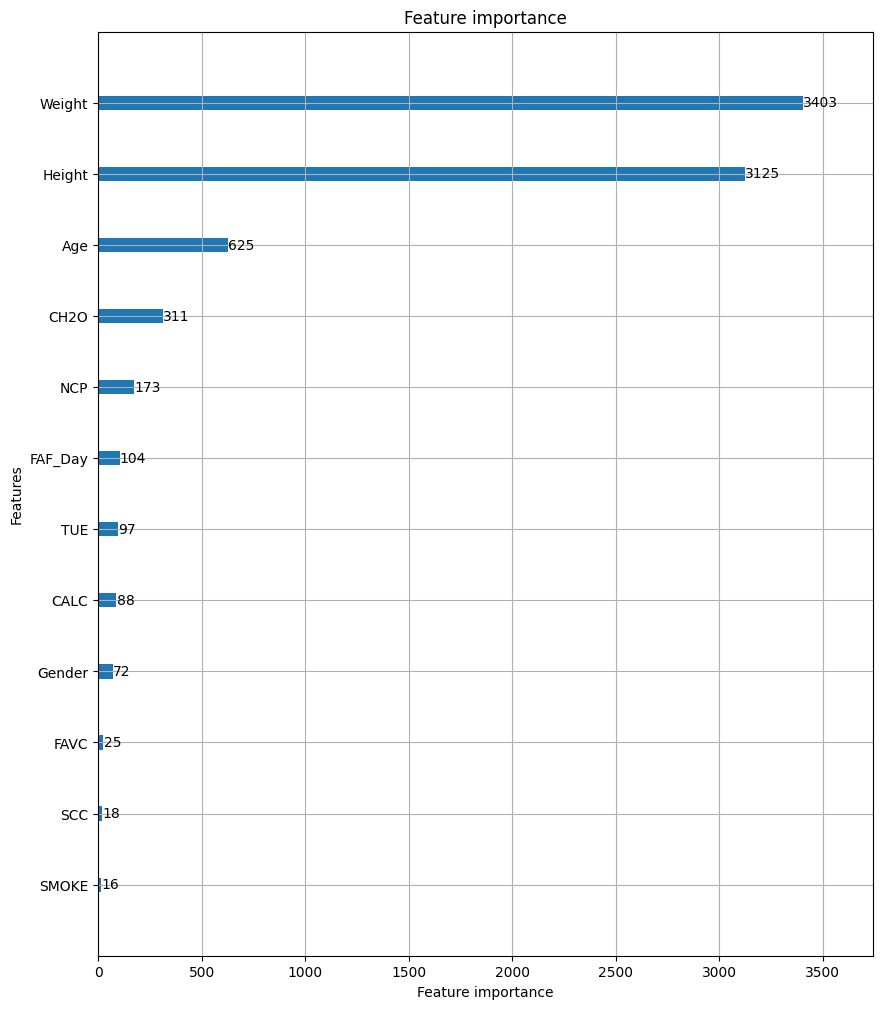

In [ ]:
# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(l_gbm_clf, ax=ax)

우선 macro를 준 데이터와 다르게 특성 중요도가 나오는 것을 확인.
또한 한국 데이터도 smoke와 scc가 큰 영향을 미치지 않은것을 확인!

## 하이퍼 파라미터

In [17]:
pip install hyperopt

In [18]:
!pip install scikit-learn

In [19]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from hyperopt import hp, fmin, Trials, tpe
from hyperopt import hp

# 하이퍼 파라미터에 대해 검색할 범위를 지정 -> 입력 변수명과 입력값의 검색 공간을 설정
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# 목적함수 생성 -> K-fold 교차 검증을 수행해 각 폴드에서 모델을 학습하고 검증. 이후 검증세트에 대한 ROC AUC 점수의 평균을 반환함
def objective_func(search_space):
    lgbm_opt = LGBMClassifier(
        random_state=42,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_estimators=int(search_space['n_estimators']),
        n_jobs=-1,
        objective='multiclass'  # 다중 분류 문제 설정
    )

    roc_auc_list = []

    # 그리드 서치의 cv=3의 역할
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(L_train):
        L_tr, l_tr = L_train.iloc[tr_index], l_train.iloc[tr_index]
        L_val, l_val = L_train.iloc[val_index], l_train.iloc[val_index]

        lgbm_opt.fit(
            L_tr,
            l_tr,
            early_stopping_rounds=50,
            eval_set=[(L_tr, l_tr), (L_val, l_val)],
            eval_metric='multi_logloss',
            # objective='multi:softmax', # lgbm에서 자동으로 다중분류를 지원함
            verbose=False  # 출력을 최소화합니다.
        )

        score = roc_auc_score(l_val, lgbm_opt.predict_proba(L_val), multi_class='ovr')
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

# 하이퍼파라미터 최적화
trials = Trials()
best = fmin(fn=objective_func, # Hyperopt의 함수인 'fmin'을 통해 최적화 수행하고 fn에 목적함수를 삽입
            space=lgbm_search_space, # 하이퍼파라미터 탐색 공간을 삽입
            algo=tpe.suggest, # 최적화 알고리즘 삽
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print("Best hyperparameters:", best)


100%|██████████| 50/50 [02:04<00:00,  2.48s/trial, best loss: -0.9877455955360307]
Best hyperparameters: {'learning_rate': 0.11440715791961518, 'max_depth': 8.0, 'min_child_samples': 73.0, 'n_estimators': 800.0, 'num_leaves': 62.0, 'subsample': 0.9414788312622542}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)
best_model.fit(L_train, l_train)

# 모델을 사용하여 예측 수행
final_preds_test = best_model.predict(L_test)
final_preds_train = best_model.predict(L_train)

# 오차 행렬 계산
y_matrix = confusion_matrix(l_test, final_preds_test)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
accuracy_test = accuracy_score(l_test, final_preds_test)
accuracy_train = accuracy_score(l_train, final_preds_train)

precision = precision_score(l_test, final_preds_test, average='macro')
recall = recall_score(l_test, final_preds_test, average='macro')
f1 = f1_score(l_test, final_preds_test, average='macro')

print("test 정확도 : {}".format(accuracy_test))
print("train 정확도 : {}".format(accuracy_train))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[ 43   6   0   0   0   0]
 [  4 366  16   0   0   0]
 [  0  14 176  10   0   0]
 [  0   0   6 251   5   0]
 [  0   0   0   7  44   2]
 [  0   0   0   0   4   5]]
test 정확도 : 0.9228362877997914
train 정확도 : 1.0
정밀도 : 0.8721684320196128
재현율 : 0.8415828418136639
F1 : 0.8551334104915908


정구화만 했을때 오히려 값이 떨어지는 것을 확인. 그러나 weighted하지 않고 정규화만 했을때에도 train이 1인것을 보아. 원래 이 데이터에서 1로 나왔을가능성이 높음.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)
best_model.fit(L_train, l_train)

# 모델을 사용하여 예측 수행
final_preds_test = best_model.predict(L_test)
final_preds_train = best_model.predict(L_train)

# 오차 행렬 계산
y_matrix = confusion_matrix(l_test, final_preds_test)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
accuracy_test = accuracy_score(l_test, final_preds_test)
accuracy_train = accuracy_score(l_train, final_preds_train)

precision = precision_score(l_test, final_preds_test, average='weighted')
recall = recall_score(l_test, final_preds_test, average='weighted')
f1_test = f1_score(l_test, final_preds_test, average='weighted')
f1_train = f1_score(l_train, final_preds_train, average='weighted')

print("test 정확도 : {}".format(accuracy_test))
print("train 정확도 : {}".format(accuracy_train))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("f1_test : {}".format(f1_test))
print("f1_train : {}".format(f1_train))

오차 행렬 : 
[[ 43   6   0   0   0   0]
 [  4 366  16   0   0   0]
 [  0  14 176  10   0   0]
 [  0   0   6 251   5   0]
 [  0   0   0   7  44   2]
 [  0   0   0   0   4   5]]
test 정확도 : 0.9228362877997914
train 정확도 : 1.0
정밀도 : 0.9222280849377654
재현율 : 0.9228362877997914
f1_test : 0.9223813827006504
f1_train : 1.0


이에 weighted도 줬으나 똑같이 train은 1이 나오며 f1의 값이 조금더 떨어지는 것을 확인함. 하지만 정밀도-재현율의 차이는 더 좁아진것을 확인!

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

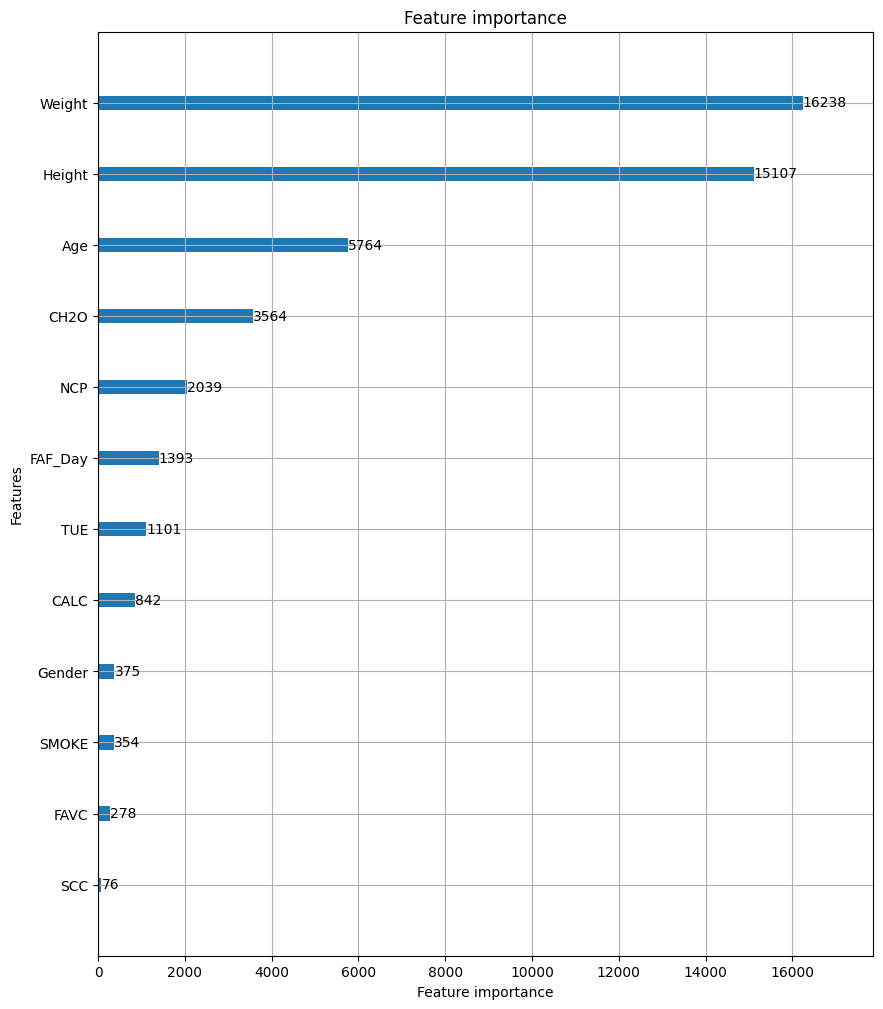

In [ ]:
# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_model, ax=ax)

## SMOTE 오버 샘플링

In [ ]:
import warnings
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

S_train, S_test, s_train, s_test = train_test_split(
    k_obe_Scaled.drop(['NObeyesdad'], axis=1),
    k_obe_Scaled['NObeyesdad'],
    random_state=42,
    stratify=k_obe_Scaled['NObeyesdad']
)

S_train, S_valid, s_train, s_valid = train_test_split(
    S_train,
    s_train,
    random_state=42,
    stratify=s_train
)
print(S_train.shape, S_valid.shape, S_test.shape, s_train.shape)


(2157, 13) (719, 13) (959, 13) (2157,)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
S_train_over, s_train_over = smote.fit_resample(S_train, s_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', S_train.shape, s_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', S_train_over.shape, s_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:' , pd.Series(s_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (2157, 13) (2157,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (5202, 13) (5202,)
SMOTE 적용 후 레이블 값 분포: 1    867
4    867
3    867
2    867
5    867
6    867
Name: NObeyesdad, dtype: int64


In [ ]:
import time
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

start_time = time.time()

# LGBMClassifier 모델 생성
s_gbm_clf = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.1
)

# 검증 데이터셋 설정
eval_sets = [
    (S_train_over, s_train_over),
    (S_valid, s_valid)
]

# 모델 훈련
s_gbm_clf.fit(
    S_train_over, s_train_over,
    early_stopping_rounds=50,
    eval_metric='multi_logloss',  # 다중 분류에 적합한 평가 지표 선택
    eval_set=eval_sets,
    verbose=True,
)

# 테스트 데이터에 대한 예측 수행
s_preds_test = s_gbm_clf.predict(S_test)
s_preds_train = s_gbm_clf.predict(S_train_over)

# 오차 행렬 계산
s_matrix = confusion_matrix(s_test,s_preds_test)
print(" SMOTE 오차 행렬 : \n{}".format(s_matrix))

# 정확도 계산
s_accuracy_test = accuracy_score(s_test, s_preds_test)
s_accuracy_train = accuracy_score(s_train_over, s_preds_train)

# 정밀도, 재현율, F1 스코어 계산
precision = precision_score(s_test, s_preds_test, average='weighted')
recall = recall_score(s_test, s_preds_test, average='weighted')
f1 = f1_score(s_test, s_preds_test, average='weighted')

print("train 정확도 : {}".format(s_accuracy_train))
print("test 정확도 : {}".format(s_accuracy_test))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

end_time = time.time()

training_time = end_time - start_time
print("Training time:", training_time, "seconds")

[1]	training's multi_logloss: 1.41416	valid_1's multi_logloss: 1.47346
[2]	training's multi_logloss: 1.15945	valid_1's multi_logloss: 1.25656
[3]	training's multi_logloss: 0.97104	valid_1's multi_logloss: 1.09435
[4]	training's multi_logloss: 0.828086	valid_1's multi_logloss: 0.974981
[5]	training's multi_logloss: 0.712715	valid_1's multi_logloss: 0.876079
[6]	training's multi_logloss: 0.618587	valid_1's multi_logloss: 0.796175
[7]	training's multi_logloss: 0.540704	valid_1's multi_logloss: 0.728741
[8]	training's multi_logloss: 0.473955	valid_1's multi_logloss: 0.670163
[9]	training's multi_logloss: 0.419816	valid_1's multi_logloss: 0.622129
[10]	training's multi_logloss: 0.369819	valid_1's multi_logloss: 0.572151
[11]	training's multi_logloss: 0.330463	valid_1's multi_logloss: 0.535939
[12]	training's multi_logloss: 0.292755	valid_1's multi_logloss: 0.499395
[13]	training's multi_logloss: 0.262205	valid_1's multi_logloss: 0.470532
[14]	training's multi_logloss: 0.233629	valid_1's mul

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

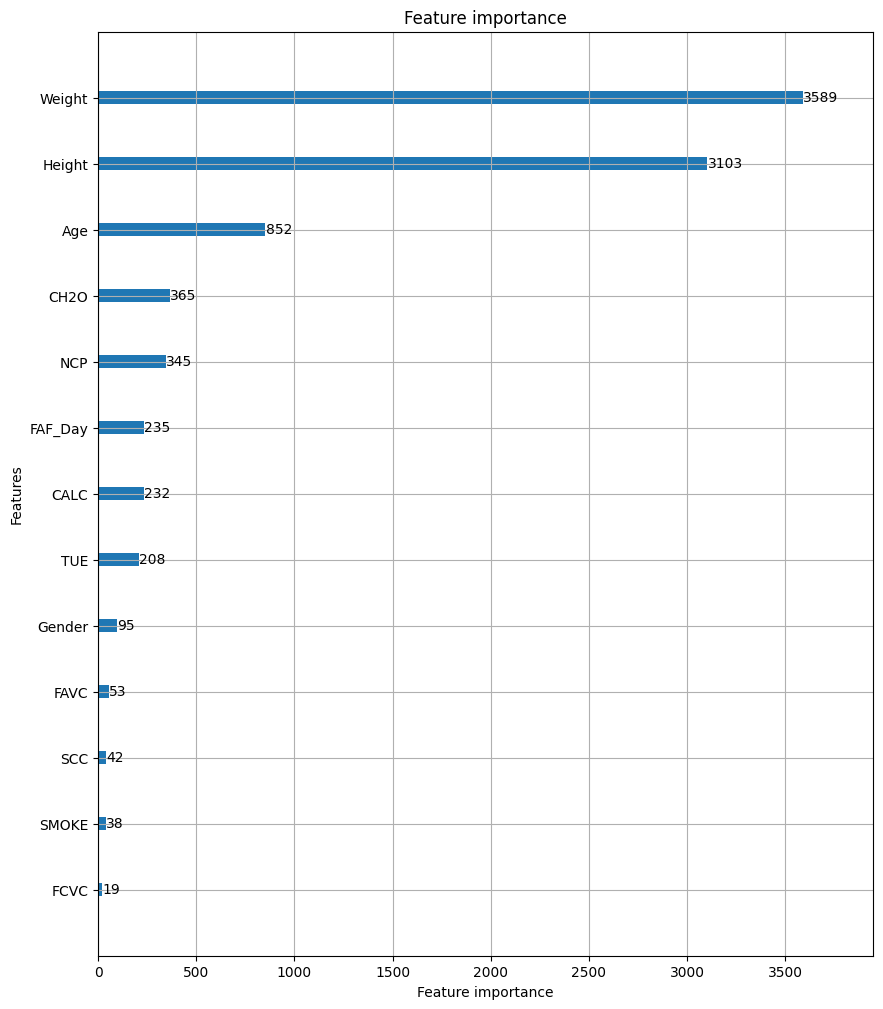

In [ ]:
# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(s_gbm_clf, ax=ax)

### hyperopt
교차검증을 할때 kfold말고 stratifiedKFold를 줘서 하면 오류없이 잘 돌아감
[참고 링크](https://stackoverflow.com/questions/65325292/error-number-of-classes-in-y-true-not-equal-to-the-number-of-columns-in-y-sc)

In [ ]:
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import numpy as np
from hyperopt import hp, fmin, Trials, tpe

# 하이퍼 파라미터에 대해 검색할 범위를 지정
sgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# 목적함수 생성
def objective_func(search_space):
    smote = SMOTE(random_state=0)
    S_train_over, s_train_over = smote.fit_resample(S_train, s_train)
    S_train_over = pd.DataFrame(S_train_over, columns=S_train.columns)  # 새로운 인덱스를 할당하여 데이터프레임으로 변환
    s_train_over = pd.Series(s_train_over, name=s_train.name)  # 새로운 인덱스를 할당하여 시리즈로 변환

    sgbm_opt = LGBMClassifier(
        random_state=42,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_estimators=int(search_space['n_estimators']),
        n_jobs=-1,
        objective='multiclass'
    )

    log_loss_list = []
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    for tr_index, val_index in skf.split(S_train_over, s_train_over):
        S_tr, s_tr = S_train_over.iloc[tr_index], s_train_over.iloc[tr_index]
        S_val, s_val = S_train_over.iloc[val_index], s_train_over.iloc[val_index]

        sgbm_opt.fit(
            S_tr,
            s_tr,
            early_stopping_rounds=50,
            eval_set=[(S_tr, s_tr), (S_val, s_val)],
            eval_metric='multi_logloss',
            verbose=False
        )

        pred_proba = sgbm_opt.predict_proba(S_val)
        score = log_loss(s_val, pred_proba)
        log_loss_list.append(score)

    return np.mean(log_loss_list)

    return np.mean(log_loss_list)

# 하이퍼파라미터 최적화
trials = Trials()
best = fmin(
    fn=objective_func,
    space=sgbm_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=30)
)

print("Best hyperparameters:", best)


100%|██████████| 50/50 [06:05<00:00,  7.32s/trial, best loss: 0.08351151163561256]
Best hyperparameters: {'learning_rate': 0.18114869505081443, 'max_depth': 9.0, 'min_child_samples': 96.0, 'n_estimators': 400.0, 'num_leaves': 47.0, 'subsample': 0.765579138561162}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)
best_model.fit(S_train_over, s_train_over)

# 모델을 사용하여 예측 수행
s_preds_test = best_model.predict(S_test)
s_preds_train = best_model.predict(S_train_over)

# 오차 행렬 계산
y_matrix = confusion_matrix(s_test, s_preds_test)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
accuracy_test = accuracy_score(s_test, s_preds_test)
accuracy_train = accuracy_score(s_train_over, s_preds_train)

precision = precision_score(s_test, s_preds_test, average='weighted')
recall = recall_score(s_test, s_preds_test, average='weighted')
f1 = f1_score(s_test, s_preds_test, average='weighted')

print("test 정확도 : {}".format(accuracy_test))
print("train 정확도 : {}".format(accuracy_train))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[ 44   5   0   0   0   0]
 [  6 364  16   0   0   0]
 [  0  10 178  12   0   0]
 [  0   0   5 253   4   0]
 [  0   0   0   5  43   5]
 [  0   0   0   0   0   9]]
test 정확도 : 0.9290928050052137
train 정확도 : 1.0
정밀도 : 0.9306738344092529
재현율 : 0.9290928050052137
F1 : 0.9292506327223135


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

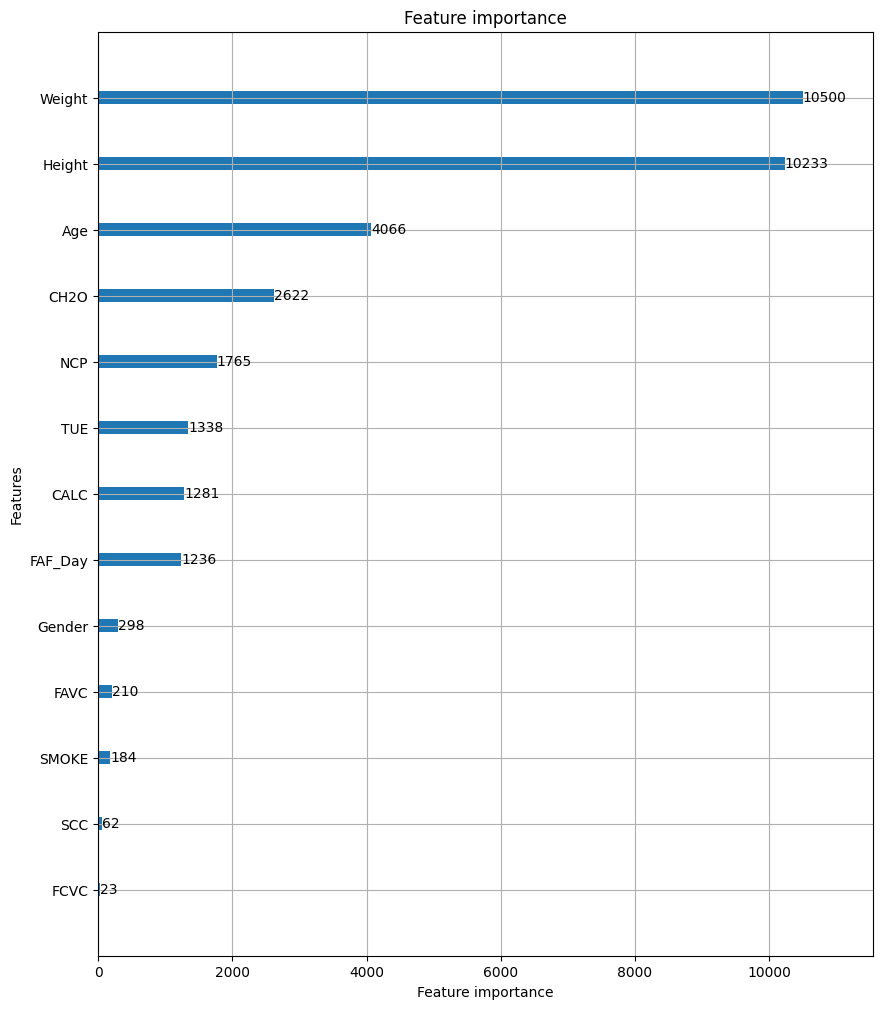

In [ ]:
# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_model, ax=ax)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np
from hyperopt import hp, fmin, Trials, tpe
from hyperopt import hp

# 하이퍼 파라미터에 대해 검색할 범위를 지정 -> 입력 변수명과 입력값의 검색 공간을 설정
sgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# 목적함수 생성 -> K-fold 교차 검증을 수행해 각 폴드에서 모델을 학습하고 검증. 이후 검증세트에 대한 ROC AUC 점수의 평균을 반환함
def objective_func(search_space):
    sgbm_opt = LGBMClassifier(
        random_state=42,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_estimators=int(search_space['n_estimators']),
        n_jobs=-1,
        objective='multiclass'  # 다중 분류 문제 설정
    )

    roc_auc_list = []

    # 그리드 서치의 cv=3의 역할
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    for tr_index, val_index in skf.split(S_train_over, s_train_over):
        S_tr, s_tr = S_train_over.iloc[tr_index], s_train_over.iloc[tr_index]
        S_val, s_val = S_train_over.iloc[val_index], s_train_over.iloc[val_index]

        sgbm_opt.fit(
            S_tr,
            s_tr,
            early_stopping_rounds=50,
            eval_set=[(S_tr, s_tr), (S_val, s_val)],
            eval_metric='multi_logloss',
            verbose=False  # 출력을 최소화합니다.
        )
        sgbm_opt.predict_proba(S_val)
        score = roc_auc_score(s_val, sgbm_opt.predict_proba(S_val), multi_class='ovr')
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

# 하이퍼파라미터 최적화
trials = Trials()
best = fmin(
    fn=objective_func,
    space=sgbm_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=30)
)

print("Best hyperparameters:", best)


100%|██████████| 50/50 [07:26<00:00,  8.93s/trial, best loss: -0.9987013246169626]
Best hyperparameters: {'learning_rate': 0.18114869505081443, 'max_depth': 9.0, 'min_child_samples': 96.0, 'n_estimators': 400.0, 'num_leaves': 47.0, 'subsample': 0.765579138561162}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)

best_model.fit(S_train_over, s_train_over)

# 모델을 사용하여 예측 수행
s_preds_test = best_model.predict(S_test)
s_preds_train = best_model.predict(S_train_over)

# 오차 행렬 계산
y_matrix = confusion_matrix(s_test, s_preds_test)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
accuracy_test = accuracy_score(s_test, s_preds_test)
accuracy_train = accuracy_score(s_train_over, s_preds_train)

precision = precision_score(s_test, s_preds_test, average='weighted')
recall = recall_score(s_test, s_preds_test, average='weighted')
f1 = f1_score(s_test, s_preds_test, average='weighted')

print("test 정확도 : {}".format(accuracy_test))
print("train 정확도 : {}".format(accuracy_train))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[ 44   5   0   0   0   0]
 [  6 364  16   0   0   0]
 [  0  10 178  12   0   0]
 [  0   0   5 253   4   0]
 [  0   0   0   5  43   5]
 [  0   0   0   0   0   9]]
test 정확도 : 0.9290928050052137
train 정확도 : 1.0
정밀도 : 0.9306738344092529
재현율 : 0.9290928050052137
F1 : 0.9292506327223135


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

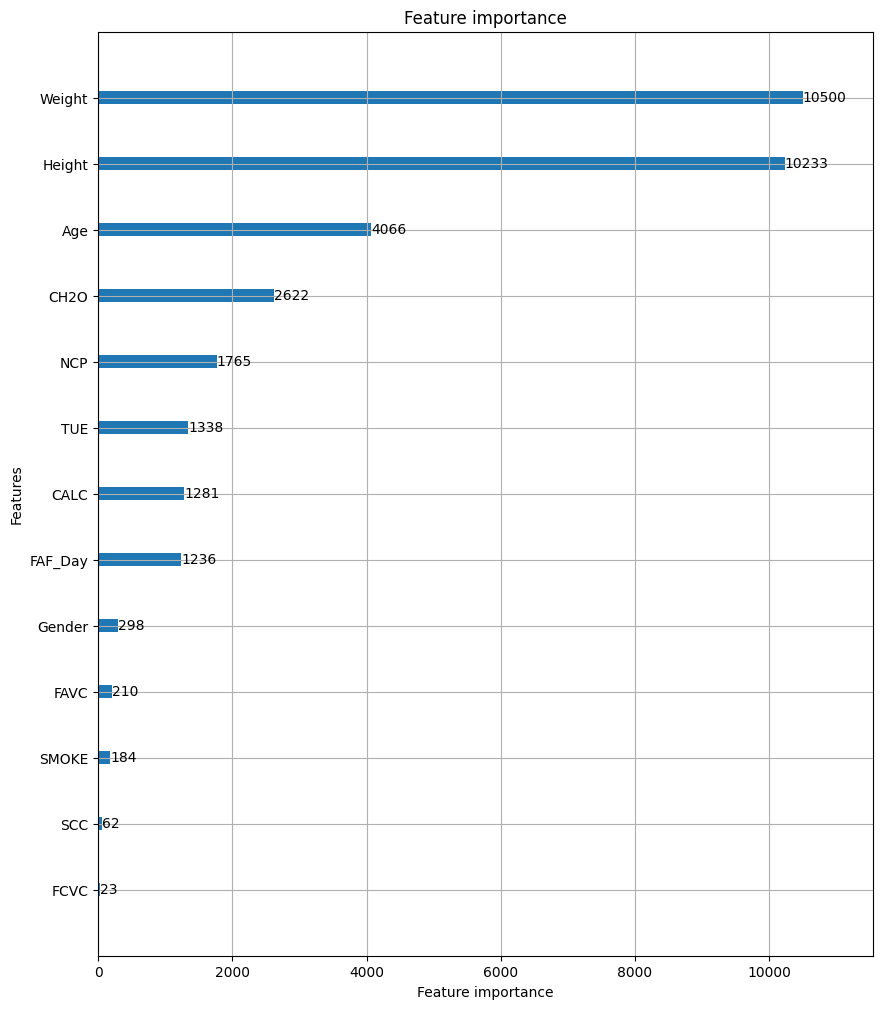

In [ ]:
# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_model, ax=ax)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from hyperopt import hp, fmin, Trials, tpe
from hyperopt import hp


# 하이퍼 파라미터에 대해 검색할 범위를 지정 -> 입력 변수명과 입력값의 검색 공간을 설정
sgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# 목적함수 생성 -> K-fold 교차 검증을 수행해 각 폴드에서 모델을 학습하고 검증. 이후 검증세트에 대한 ROC AUC 점수의 평균을 반환함
def objective_func(search_space):
    sgbm_opt = LGBMClassifier(
        random_state=42,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_estimators=int(search_space['n_estimators']),
        n_jobs=-1,
        objective='multiclass',  # 다중 분류 문제 설정
        )

    roc_auc_list = []

    # 그리드 서치의 cv=3의 역할
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(S_train_over):
        S_tr, s_tr = S_train_over.iloc[tr_index], s_train_over.iloc[tr_index]
        S_val, s_val = S_train_over.iloc[val_index], s_train_over.iloc[val_index]

        sgbm_opt.fit(
            S_tr,
            s_tr,
            early_stopping_rounds=50,
            eval_set=[(S_tr, s_tr), (S_val, s_val)],
            eval_metric='multi_logloss',
            # objective='multi:softmax', # lgbm에서 자동으로 다중분류를 지원함
            verbose=False  # 출력을 최소화합니다.
        )

        score = f1_score(s_val, sgbm_opt.predict(S_val), average='weighted')
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

# 하이퍼파라미터 최적화
trials = Trials()
best = fmin(fn=objective_func, # Hyperopt의 함수인 'fmin'을 통해 최적화 수행하고 fn에 목적함수를 삽입
            space=sgbm_search_space, # 하이퍼파라미터 탐색 공간을 삽입
            algo=tpe.suggest, # 최적화 알고리즘 삽
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print("Best hyperparameters:", best)

100%|██████████| 50/50 [05:11<00:00,  6.23s/trial, best loss: -0.9213779516996438]
Best hyperparameters: {'learning_rate': 0.1023187523798992, 'max_depth': 10.0, 'min_child_samples': 77.0, 'n_estimators': 200.0, 'num_leaves': 60.0, 'subsample': 0.7888644278654483}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)

best_model.fit(S_train_over, s_train_over)

# 모델을 사용하여 예측 수행
s_preds_test = best_model.predict(S_test)
s_preds_train = best_model.predict(S_train_over)

# 오차 행렬 계산
y_matrix = confusion_matrix(s_test, s_preds_test)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
accuracy_test = accuracy_score(s_test, s_preds_test)
accuracy_train = accuracy_score(s_train_over, s_preds_train)

precision = precision_score(s_test, s_preds_test, average='weighted')
recall = recall_score(s_test, s_preds_test, average='weighted')
f1 = f1_score(s_test, s_preds_test, average='weighted')

print("test 정확도 : {}".format(accuracy_test))
print("train 정확도 : {}".format(accuracy_train))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[ 44   5   0   0   0   0]
 [  5 365  16   0   0   0]
 [  0   9 182   9   0   0]
 [  0   0   7 251   4   0]
 [  0   0   0   5  46   2]
 [  0   0   0   0   0   9]]
test 정확도 : 0.935349322210636
train 정확도 : 1.0
정밀도 : 0.9359588397722013
재현율 : 0.935349322210636
F1 : 0.9354576840680895
